# 3.1 Simple Pendulum Diff.Eq.-Solver
Students: Gabriel Wolf and Jakob Scheiber

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt a: General Explicit Runge Kutta
Die Funktion implementieren

In [8]:
#Funktion für das explizite Runge-Kutta-Verfahren 
def rk_explicit(F, y0, t, e, A, b, c):
    """
    exp. Runge–Kutta für y' =F(y, t).
    y0: 1D array
    t:  1D array der Zeit mt Schritten e (epsilon xD)
    A,b,c: Butcher coeff, bitte vorher definieren
    """
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    c = np.array(c, dtype=float)

    s = len(b) 
    y0 = np.array(y0, dtype=float)
    dim = len(y0)

    Y = np.zeros((len(t), dim))
    Y[0] = y0

    for n in range(len(t) - 1):
        yn = Y[n]
        tn = t[n]

        K = np.zeros((s, dim))  # stage derivatives

        for i in range(s):
            y_stage = yn.copy()
            for j in range(i):  # explizit nur j < i
                y_stage += e * A[i, j] * K[j]

            K[i] = F(y_stage, tn + c[i] * e)

        Y[n + 1] = yn.copy()
        for i in range(s):
            Y[n + 1] += e * b[i] * K[i]

    return Y

### Unterpunkt b: Solve for pendulum

In [9]:
#Butcher 
#zerst Euler
A_eu = [[0.0]]
b_eu = [1.0]
c_eu = [0.0]

#Runge Kutta Odg 4
A_rk4 = [
    [0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
]
b_rk4 = [1/6, 1/3, 1/3, 1/6]
c_rk4 = [0.0, 0.5, 0.5, 1.0]

In [10]:
# definiere masse und länge
m=1.0  # Masse in kg
l=1.0  # Länge in m
w_sq=9.81/l  #Quadrat Winkelgeschwindigkeit
t=np.linspace(0,10,1000)  # Zeitvektor von 0 bis 10 Sekunden mit 1000 Schritten
e=(t[1]-t[0])  # Zeitschrittweite
F = lambda y, t: np.array([y[1], -w_sq * np.sin(y[0])], dtype=float)
#Startbedingungen oder so
theta0 = 1  # bei 0 is stillstand pendel hängt gerade
v0 = 2*np.sqrt(w_sq) #anfangsspeed ist 2w
y0 = [theta0, v0] #Anfangszustand als Vektor

#actual solving
Y_euler = rk_explicit(F, y0, t, e, A_eu, b_eu, c_eu)
Y_rk4   = rk_explicit(F, y0, t, e, A_rk4, b_rk4, c_rk4)
theta_euler = Y_euler[:, 0]
theta_rk4 =Y_rk4[:, 0]
v_euler= Y_euler[:, 1]
v_rk4= Y_rk4[:, 1]

print(e)

0.01001001001001001


### Unterpunkt c: Plots of $E(t)$ and $\theta(t)$
Bestimmung und plotten der Energie und Winkelauslenkungen für verschiedene Fälle,

primär für verschiedene Zeitschrittweiten $\epsilon$ bzw. e.

Ich habe theta0 und v0 mal grundsätzlich gleich gelassen, damit man die unterschiede der Schrittweiten gut sieht.

Plot der Auslenkung (Winkelverlauf), aufgetragen über die Zeit für die verschiedenen Fälle:
Fall 1: e=(t1-t0)
Fall 2: e=(t1-t0)*2
Fall 3: e=(t1-t0)*3


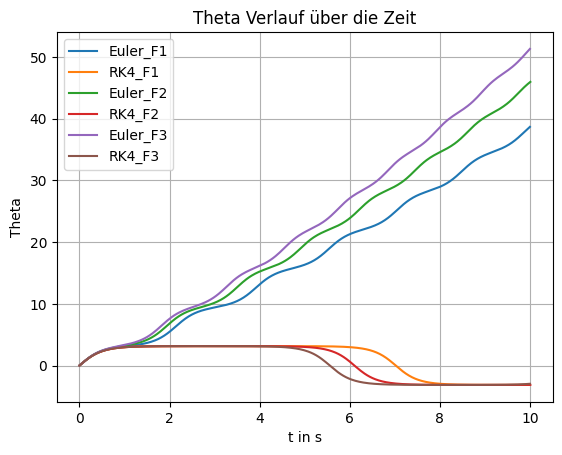

Plot der Energien, aufgetragen über die Zeit für die verschiedenen Fälle:
Fall 1: e=(t1-t0)
Fall 2: e=(t1-t0)*2
Fall 3: e=(t1-t0)*3


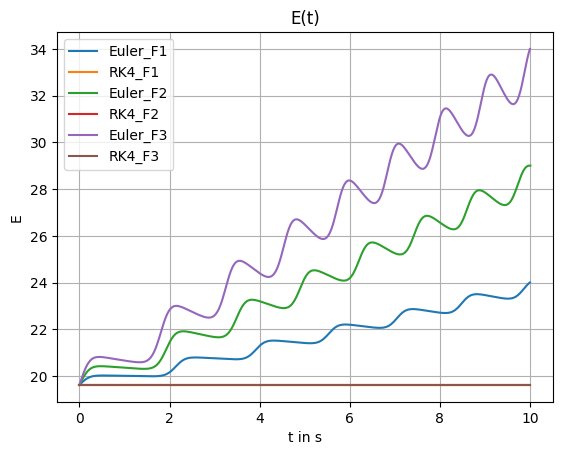

In [11]:
##############  Fall1: (0,2w,e=(t1-t0))     ###############################################################
e=(t[1]-t[0])
t1=np.arange(0,10+e,e) # damit ned nur des e künstlich gewarpt is xD
theta0=0
v0=2*np.sqrt(w_sq)
y0 = [theta0, v0]
#Theta
Y_euler = rk_explicit(F, y0, t1, e, A_eu, b_eu, c_eu)
Y_rk4 = rk_explicit(F, y0, t1, e, A_rk4,b_rk4, c_rk4)
theta_euler_1 = Y_euler[:, 0]
theta_rk4_1 =Y_rk4[:,0]
v_euler_1= Y_euler[:, 1]
v_rk4_1= Y_rk4[:,1]
# Energie: E =0.5ml^2*v^2 + mgl*(1-costheta)
E_euler_1 = 0.5 * m * (l**2) * (v_euler_1**2) + m*9.81*l * (1 - np.cos(theta_euler_1))
E_rk4_1   = 0.5 * m * (l**2) * (v_rk4_1**2) + m*9.81*l* (1 - np.cos(theta_rk4_1))

###############  Fall2: (0,2w,e=(t1-t0)*2)  ###############################################################
e=(t[1]-t[0])*2
t2=np.arange(0,10+e,e) # damit ned nur des e künstlich gewarpt is xD
theta0=0
v0=2*np.sqrt(w_sq)
y0 = [theta0, v0]
# Theta
Y_euler = rk_explicit(F, y0, t2, e, A_eu, b_eu, c_eu)
Y_rk4 = rk_explicit(F, y0, t2, e, A_rk4,b_rk4, c_rk4)
theta_euler_2 = Y_euler[:, 0]
theta_rk4_2 =Y_rk4[:,0]
v_euler_2= Y_euler[:, 1]
v_rk4_2= Y_rk4[:,1]
# Energie: E =0.5ml^2*v^2 + mgl*(1-costheta)
E_euler_2 = 0.5 * m * (l**2) * (v_euler_2**2) + m*9.81*l * (1 - np.cos(theta_euler_2))
E_rk4_2   = 0.5 * m * (l**2) * (v_rk4_2**2) + m*9.81*l* (1 - np.cos(theta_rk4_2))

################  Fall3: (0,2w,e=(t1-t0)*3)     ###############################################################
e=(t[1]-t[0])*3
t3=np.arange(0,10+e,e) # damit ned nur des e künstlich gewarpt is xD
theta0=0
v0=2*np.sqrt(w_sq)
y0 = [theta0, v0]
# Theta
Y_euler = rk_explicit(F, y0, t3, e, A_eu, b_eu, c_eu)
Y_rk4 = rk_explicit(F, y0, t3, e, A_rk4,b_rk4, c_rk4)
theta_euler_3 = Y_euler[:, 0]
theta_rk4_3 =Y_rk4[:,0]
v_euler_3= Y_euler[:, 1]
v_rk4_3= Y_rk4[:,1]
# Energie: E =0.5ml^2*v^2 + mgl*(1-costheta)
E_euler_3 = 0.5 * m * (l**2) * (v_euler_3**2) + m*9.81*l * (1 - np.cos(theta_euler_3))
E_rk4_3   = 0.5 * m * (l**2) * (v_rk4_3**2) + m*9.81*l* (1 - np.cos(theta_rk4_3))




#Winkel
print("Plot der Auslenkung (Winkelverlauf), aufgetragen über die Zeit für die verschiedenen Fälle:")
print("Fall 1: e=(t1-t0)")
print("Fall 2: e=(t1-t0)*2")
print("Fall 3: e=(t1-t0)*3")
plt.figure()
plt.plot(t1, theta_euler_1, label="Euler_F1")
plt.plot(t1, theta_rk4_1, label="RK4_F1")
plt.plot(t2, theta_euler_2, label="Euler_F2")
plt.plot(t2, theta_rk4_2, label="RK4_F2")
plt.plot(t3, theta_euler_3, label="Euler_F3")
plt.plot(t3, theta_rk4_3, label="RK4_F3")
plt.title("Theta Verlauf über die Zeit")
plt.xlabel("t in s")
plt.ylabel("Theta")
plt.grid(True)
plt.legend()
plt.show()


#Energiaaa
print("Plot der Energien, aufgetragen über die Zeit für die verschiedenen Fälle:")
print("Fall 1: e=(t1-t0)")
print("Fall 2: e=(t1-t0)*2")
print("Fall 3: e=(t1-t0)*3")
plt.figure()
plt.plot(t1, E_euler_1, label="Euler_F1")
plt.plot(t1, E_rk4_1,   label="RK4_F1")
plt.plot(t2, E_euler_2, label="Euler_F2")
plt.plot(t2, E_rk4_2,   label="RK4_F2")
plt.plot(t3, E_euler_3, label="Euler_F3")
plt.plot(t3, E_rk4_3,   label="RK4_F3")
plt.title("E(t)")
plt.xlabel("t in s")
plt.ylabel("E")
plt.grid(True)
plt.legend()
plt.show()

### Unterpunkt d: Swinging periodicity and comparison

In [13]:
T0 = 2*np.pi/np.sqrt(w_sq)  # klassische analytische Periodendauer

e =0.001
t =np.arange(0, 30+e, e)
y0 =[np.pi/3, 0.0]
Y= rk_explicit(F, y0, t, e, A_rk4, b_rk4, c_rk4)
theta = Y[:,0]
v= Y[:,1]

# maxima peak to peak um periodendauer easy zu bestimmen
peaks = np.where((v[:-1] > 0) & (v[1:] <= 0))[0]
Tnum = np.mean(np.diff(t[peaks])) #mittlere peak-to-peak Zeit

print("T_analyitisch (s)=", T0)
print("T_num (s)=", Tnum)
print(w_sq)

T_analyitisch (s)= 2.006066680710647
T_num (s)= 2.1529166666666666
9.81
